In [3]:
import os 
import re 
import pandas as pd 
import tensorflow as tf 
from tensorflow.keras import utils 
data_set = tf.keras.utils.get_file(
     fname="imdb.tar.gz", #download file name 
     origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz", extract = True )

84140032/84125825 [==============================] - 2s 0us/step


In [4]:
data_set

'/root/.keras/datasets/imdb.tar.gz'

In [5]:
def directory_data(directory):
  data = {}
  data["review"] = []
  for file_path in os.listdir(directory):
    with open(os.path.join(directory, file_path), "r", encoding='utf-8') as file:
      data["review"].append(file.read() )
  return pd.DataFrame.from_dict(data)

In [6]:
def data(directory): 
  pos_df = directory_data(os.path.join(directory, "pos")) 
  neg_df = directory_data(os.path.join(directory, "neg")) 
  pos_df["sentiment"] = 1 
  neg_df["sentiment"] = 0 
  return pd.concat([pos_df, neg_df])

In [7]:
train_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "train")) 
test_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "test"))

In [12]:
train_df.head()
reviews = list(train_df['review'])

# 문자열 문장 리스트를 토큰화
tokenized_reviews = [r.split() for r in reviews]
# 토큰화된 리스트에 대한 각 길이를 저장
review_len_by_token = [len(t) for t in tokenized_reviews]
# 토큰화된 것을 붙여서 음절의 길이를 저장
review_len_by_alphabet = [len(s.replace(' ', '')) for s in reviews]

Text(0, 0.5, 'Number of Reviews')

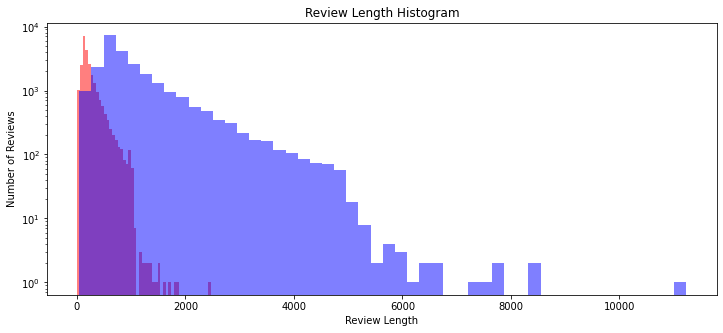

In [13]:
import matplotlib.pyplot as plt

# alpha -> 투명도
# bins -> 히스토그램 값들에 대한 버켓 범위
plt.figure(figsize=(12,5))
plt.hist(review_len_by_token, bins=50, alpha=0.5, color='r', label='word')
plt.hist(review_len_by_alphabet, bins=50, alpha=0.5, color='b', label='alphabet')
plt.yscale('log', nonposy='clip')

plt.title('Review Length Histogram')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')

In [14]:
import numpy as np
print('문장  최대길이:', np.max(review_len_by_token))
print('문장  최소길이:', np.min(review_len_by_token))
print('문장  평균길이:', np.mean(review_len_by_token))
print('문장 길이 표준편차:', np.std(review_len_by_token))
print('문장 중간길이:', np.median(review_len_by_token))
# 사분위의 대한 경우는 0~ 100 스케일로 되어있음
print('제 1사분위 길이:', np.percentile(review_len_by_token, 25))
print('제 3사분위 길이:', np.percentile(review_len_by_token, 75))

문장  최대길이: 2470
문장  최소길이: 10
문장  평균길이: 233.7872
문장 길이 표준편차: 173.72955740506563
문장 중간길이: 174.0
제 1사분위 길이: 127.0
제 3사분위 길이: 284.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f65a38d0dd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f65a38d7e50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f65a38e5410>],
 'means': [<matplotlib.lines.Line2D at 0x7f65a38dee90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f65a38de950>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f65a38d73d0>,
  <matplotlib.lines.Line2D at 0x7f65a38d7910>]}

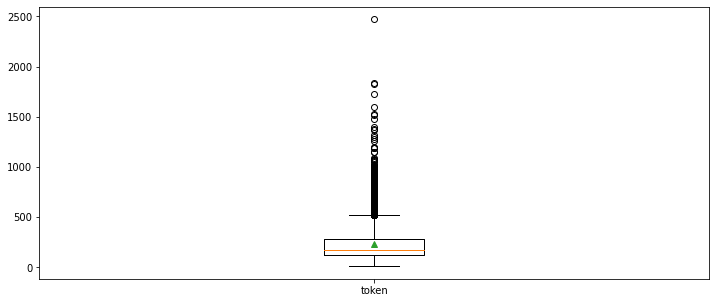

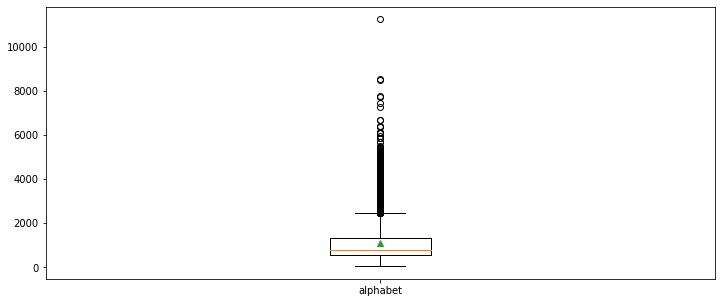

In [15]:
plt.figure(figsize=(12,5))
# 박스플롯
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
plt.boxplot([review_len_by_token],
            labels=['token'],
            showmeans=True)
plt.figure(figsize=(12,5))
plt.boxplot([review_len_by_alphabet],
            labels=['alphabet'],
            showmeans=True)

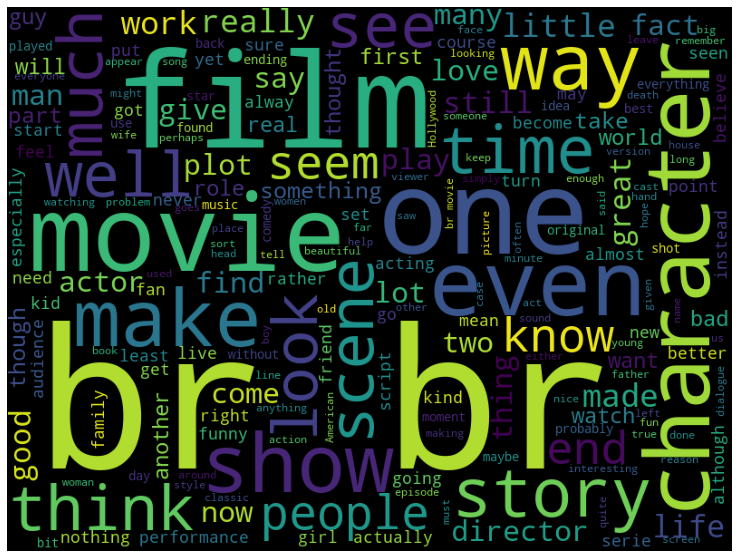

In [21]:
# word cloud
# word cloud 안보인다면
# pip --trusted-host pypi.org --trusted-host files.pythonhosted.org install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black', width = 800, height = 600).generate(' '.join(train_df['review']))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment = train_df['sentiment'].value_counts()
sentiment

1    12500
0    12500
Name: sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


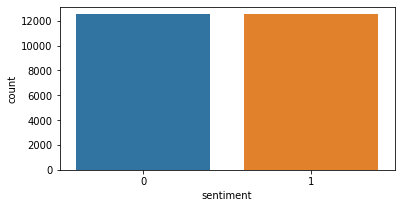

In [24]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(train_df['sentiment'])
plt.show()